In [1]:
from sympy import *

In [49]:
import numpy as np

In [67]:
import matplotlib.pyplot as plt

In [4]:
J_2, J_3, eta = symbols('J_2 J_3 eta')

In [5]:
eta_b = - (1+4*J_2)/(4*J_2+8*J_3)

In [6]:
eta_b

(-4*J_2 - 1)/(4*J_2 + 8*J_3)

In [15]:
E_b = (2*eta+1) + J_2*4*(eta**2+2*eta) + J_3*8*eta**2

In [16]:
E_b_star = simplify(E_b.subs(eta, eta_b))

In [42]:
E_b_star

(-4*J_2**2 - J_2 + 2*J_3 - 1/4)/(J_2 + 2*J_3)

In [17]:
E_a_bound = 1 - 4*J_2-8*J_3

In [18]:
E_b_bound = E_b.subs(eta, -1)

In [20]:
E_b_bound

-4*J_2 + 8*J_3 - 1

In [21]:
E_c = 3*eta + 12*J_2*eta**2 + 8*J_3*eta**3

In [23]:
E_c_bound = simplify(E_c.subs(eta, -1))

In [24]:
E_c_bound

12*J_2 - 8*J_3 - 3

In [30]:
eta_c = solve(diff(E_c, eta), eta)
eta_c_1 = eta_c[0]
eta_c_2 = eta_c[1]

In [31]:
eta_c_1

(-J_2/2 + sqrt(4*J_2**2 - 2*J_3)/4)/J_3

In [32]:
eta_c_2

-(J_2/2 + sqrt(4*J_2**2 - 2*J_3)/4)/J_3

In [39]:
E_star_c_1 = simplify(E_c.subs(eta,eta_c_1))
simplify(factor(E_star_c_1))

(2*J_2**3 - J_2**2*sqrt(4*J_2**2 - 2*J_3) - 3*J_2*J_3/2 + J_3*sqrt(4*J_2**2 - 2*J_3)/2)/J_3**2

In [40]:
E_star_c_2 = simplify(E_c.subs(eta,eta_c_2))
simplify(factor(E_star_c_2))

(2*J_2**3 + J_2**2*sqrt(4*J_2**2 - 2*J_3) - 3*J_2*J_3/2 - J_3*sqrt(4*J_2**2 - 2*J_3)/2)/J_3**2

In [41]:
E_c_bound

12*J_2 - 8*J_3 - 3

In [43]:
E_a_bound

-4*J_2 - 8*J_3 + 1

In [44]:
E_b_bound

-4*J_2 + 8*J_3 - 1

In [71]:
colors = ['black', 'blue', 'darkblue']# 'purple', 'green', 'crimson']
names = ['a_bound', 'b_bound', 'c_bound', 'b_star', 'c_star_1', 'c_star_2']

In [79]:
Energyes = Matrix([E_a_bound, E_b_bound, E_c_bound])#, E_b_star, E_star_c_1, E_star_c_2])

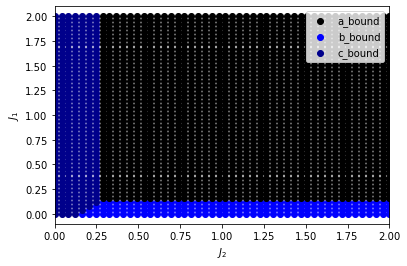

In [103]:
J_2_sample = np.linspace(0.001,2, 50)
J_3_sample = np.linspace(0.001,2, 50)
plt.figure()
for j_2 in J_2_sample:
    for j_3 in J_3_sample:
        #print()
        egs = np.array(Energyes.evalf(subs={J_2:j_2, J_3:j_3}), dtype=np.float64).reshape(-1)
        color= colors
        if abs(eta_b.evalf(subs={J_2:j_2, J_3:j_3}))<1:
            egs = np.append(egs, (E_b_star.evalf(subs={J_2:j_2, J_3:j_3})))
            color.append('purple')
        if 2*j_2**2>j_3:
                if abs(eta_c_1.evalf(subs={J_2:j_2, J_3:j_3}))<1:
                    egs = np.append(egs, (E_star_c_1.evalf(subs={J_2:j_2, J_3:j_3})))
                    color.append('green')
                if abs(eta_c_2.evalf(subs={J_2:j_2, J_3:j_3}))<1:
                    egs = np.append(egs, (E_star_c_2.evalf(subs={J_2:j_2, J_3:j_3})))
                    color.append('crimson')                
        index = np.argmin(egs)
        plt.scatter(j_2,j_3, c=color[index])
plt.xlabel(r'$J_2$')
plt.ylabel(r'$J_3$')
plt.scatter(-1,0,label='a_bound', c='black')
plt.scatter(-1,1,label='b_bound', c='blue')
plt.scatter(-1,2,label='c_bound', c='darkblue')
plt.xlim(0,2)

plt.legend()

Поэтому достаточно сравнивать граничные энергии

In [104]:
E_a_bound

-4*J_2 - 8*J_3 + 1

In [105]:
E_b_bound

-4*J_2 + 8*J_3 - 1

In [106]:
E_c_bound

12*J_2 - 8*J_3 - 3

Граница a & b:
$J_3 = 1/8$

Граница a & c:
$J_2 = 1/4$

Граница b & c:
$J_2 - J_3 = 1/8$